# ЗАДАНИЕ 2: Graph500 на кластере
С амазоном немного не срослось, поэтому с Андреем Демченко собрали кластер на 4 машинах, обьединив  локальной сетью. Характеристики машин:
1. Graph500-1
    * CPU: Core i5-5300U (2 cores, 2.7 GHz, 3M cache) 
    * RAM: 8GB DDR3L 
    * Storage: 256 GB SSD 
    * OS: Ubuntu 16.04 
+ Graph500-2
    * CPU: Intel Core i7 6700HQ (4 cores, 2.60 GHz, 6M cache) 
    * RAM: 16 GB RAM DDR4 
    * Storage: 500 GB SSD 
    * OS: Ubuntu 14.04 
+ Graph500-3 
    * CPU: AMD Athlon II X2 (2 cores, 2.1GHz, 2M cache) 
    * RAM: 2 GB RAM DDR3L 
    * Storage: 500 GB HDD 
    * OS: Ubuntu 16.04 
+ Graph500-4 
    * CPU: Intel Core i5 3210M (4 cores, 2.50GHz, 3M cache) 
    * RAM: 8 GB DDR3 
    * Storage: 500 GB HDD 
    * OS: Ubuntu 14.04
    
Результаты получились на порядок хуже, да и по мониторингу нагрузки сети и процессоров было заметно, что сеть здесь слабое место, 10MB/s явно не хватало. Как всегда, результаты в этой же папке с префиксом mpi_cluster. Не упав отработали лишь такие реализации mpi: one_sided и simple. one_sided4 - значит, что запускалось на всех 4х машинах, one_sided3 - на трех(без Graph500-4):

In [7]:
import re
import matplotlib.pyplot as plt
%matplotlib inline  

def extract_teps(file_name):
    f = open(file_name,'r')
    found = re.findall('median_TEPS: (.+?)\n', f.read())
    return [float(el) for el in found]

def compare_types(type_list):
    xlabel = range(12,14)
    plt.ylabel('median_TEPS')
    plt.xlabel('matrix_size(2^degree)')
    for file_name in type_list:
        teps = extract_teps(file_name)
        plt.plot(xlabel,teps, label=file_name)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    

## Сравнение mpi simple и one_sided методов на SCALE 12-13 на 3-4 машинах:

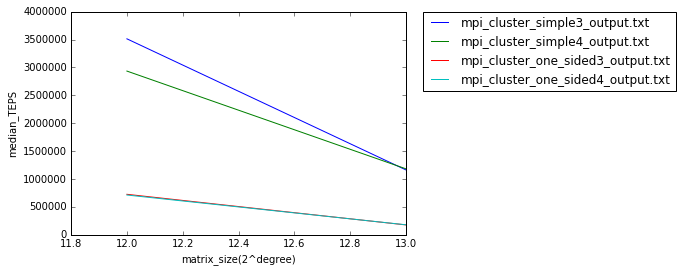

In [8]:
compare_types(['mpi_cluster_simple3_output.txt','mpi_cluster_simple4_output.txt',
              'mpi_cluster_one_sided3_output.txt', 'mpi_cluster_one_sided4_output.txt'])

### Как видим, для one_sided в принципе нет  различных результатов между 3 машинами в кластере и 4мя. А  simple на 3х для SCALE 12 работает чуть получше. Да и как видим, результаты абсолютно не сопоставимы с таковыми на одной машине, кластер достаточно слаб в скорости передаче информации между машинами, как упоминал 